# Filter-Based Feature Selection Methods (Classification)

Having irrelevant features in the data can lower the accuracy of the machine learning models. 

Feature selection is when you choose the features that contribute the most to your prediction variable or output.

In this notebook we will study a classification problem with many categorical and numerical predictors.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 10)
import matplotlib.pyplot as plt
import seaborn as sns

## Car Evaluation

We will use the Car Evaluation Data Set [https://archive.ics.uci.edu/ml/datasets/Car+Evaluation] from the UCI Machine Learning Repository [https://archive-beta.ics.uci.edu/]. It includes categorical variables. 

In [2]:
# Defining the headers
headers = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "car_class"]

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
                  header=None, names=headers, na_values="?" )
df.head()

,buying,maint,doors,persons,lug_boot,safety,car_class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
# Checking the number of missing values in each column
df.isnull().sum()

buying       0
maint        0
doors        0
persons      0
lug_boot     0
safety       0
car_class    0
dtype: int64

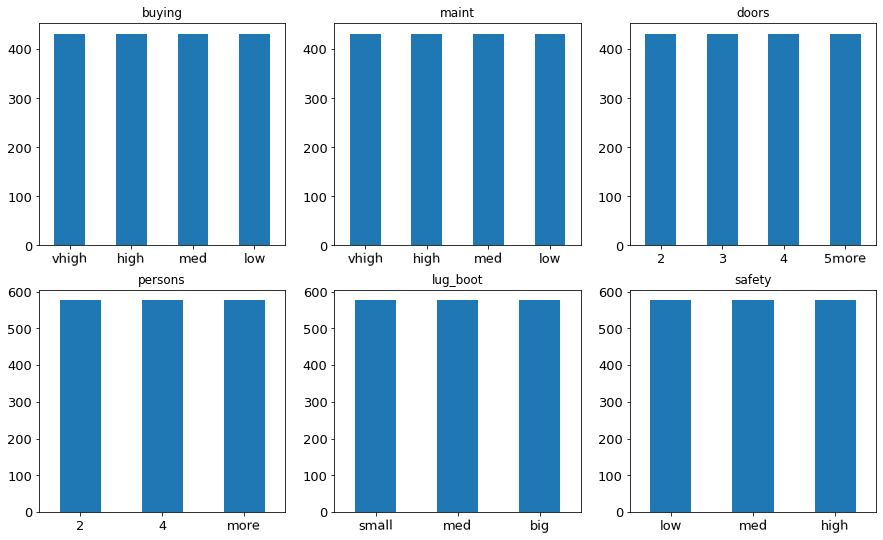

In [5]:
plt.figure(figsize=(15,9))

plt.subplot(231)
df.buying.value_counts().plot(kind='bar', rot=True, title='buying', fontsize=13)

plt.subplot(232)
df.maint.value_counts().plot(kind='bar', rot=True, title='maint', fontsize=13)

plt.subplot(233)
df.doors.value_counts().plot(kind='bar', rot=True, title='doors', fontsize=13)

plt.subplot(234)
df.persons.value_counts().plot(kind='bar', rot=True, title='persons', fontsize=13)

plt.subplot(235)
df.lug_boot.value_counts().plot(kind='bar', rot=True, title='lug_boot', fontsize=13)

plt.subplot(236)
df.safety.value_counts().plot(kind='bar', rot=True, title='safety', fontsize=13);

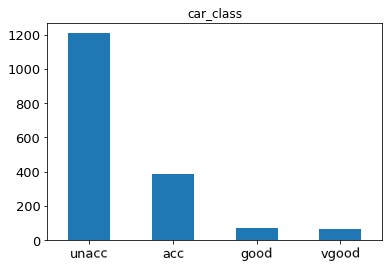

In [6]:
# the class column
df.car_class.value_counts().plot(kind='bar', rot=True, title='car_class', fontsize=13);

## The independence Chi-square Test

In [7]:
from scipy.stats import chi2_contingency

We will se two examples of the independence chi-square test.

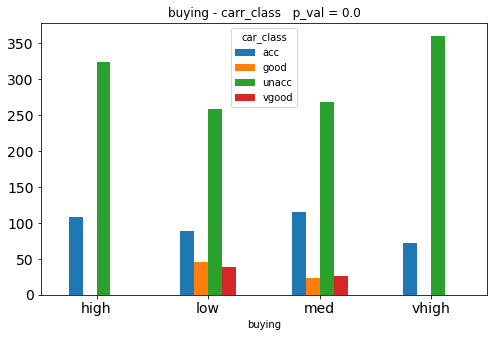

In [8]:
crosstab_buying = pd.crosstab(df.buying, df.car_class)
pval_buying = np.round(chi2_contingency(crosstab_buying)[1],6)
crosstab_buying.plot(kind='bar', rot=0, fontsize=14, figsize=(8,5), 
                title='buying - carr_class   p_val = '+str(pval_buying));

0.0 < 0.05, there are significant differences between the variables buying and car_class

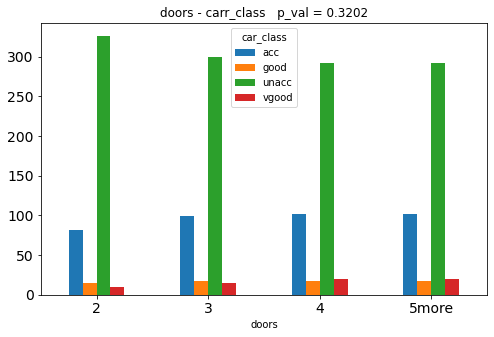

In [9]:
crosstab_doors = pd.crosstab(df.doors, df.car_class)
pval_doors = np.round(chi2_contingency(crosstab_doors)[1],4)
crosstab_doors.plot(kind='bar', rot=0, fontsize=14, figsize=(8,5), 
                    title='doors - carr_class   p_val = '+str(pval_doors));

0.3202 > 0.05 there are no reasons to assume there are significant differences between the variables doors and car_class

## The `scikit-learn` library

The scikit-learn library provides many different filtering methods once statistics have been calculated for each input variable with the target.

One of them is:
- `SelectFwe`: Select the p-values corresponding to Family-wise error rate.
- `SelectFpr`: Select the pvalues below alpha based on a FPR test.
- `SelectPercentile`: Select features according to a percentile of the highest scores.
- `SelectKBest`: Select the top k variables 

In [10]:
from sklearn.feature_selection import SelectFwe, SelectFpr, SelectPercentile, SelectKBest

## Preparing the data

In [11]:
df.buying.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [12]:
# Creating a dictionary to map the values to the categories
buying_dict = {'low':1, 'med':2, 'high':3, 'vhigh':4}

In [13]:
df['buying'] = df['buying'].map(buying_dict)

In [14]:
df.maint.unique()

array(['vhigh', 'high', 'med', 'low'], dtype=object)

In [15]:
# buying and maint have the same values
df['maint'] = df['maint'].map(buying_dict)

In [16]:
print('doors    -> ', df.doors.unique()) 
print('persons  -> ', df.persons.unique())
print('lug_boot -> ', df.doors.unique())
print('safety   -> ', df.doors.unique())

doors    ->  ['2' '3' '4' '5more']
persons  ->  ['2' '4' 'more']
lug_boot ->  ['2' '3' '4' '5more']
safety   ->  ['2' '3' '4' '5more']


In [17]:
# Creating a dictionary to map the values to the categories
doors_dict = {'2':2, '3':3, '4':4, '5more':5}
persons_dict = {'2':1, '4':2, 'more':3}
lug_boot_dict = {'small':1, 'med':2, 'big':3}
safety_dict = {'low':1, 'med':2, 'high':3}

In [18]:
df['doors']    = df['doors'].map(doors_dict)
df['persons']  = df['persons'].map(persons_dict)
df['lug_boot'] = df['lug_boot'].map(lug_boot_dict)
df['safety']   = df['safety'].map(safety_dict)
df.head(3)

,buying,maint,doors,persons,lug_boot,safety,car_class
0,4,4,2,1,1,1,unacc
1,4,4,2,1,1,2,unacc
2,4,4,2,1,1,3,unacc


In [19]:
# The class variable
df.car_class.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [20]:
# Creating a dictionary to map the values to the categories
car_dict = {'unacc':1, 'acc':2, 'good':3, 'vgood':4}

In [21]:
df['car_class'] = df['car_class'].map(car_dict)

In [22]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,car_class
0,4,4,2,1,1,1,1
1,4,4,2,1,1,2,1
2,4,4,2,1,1,3,1
3,4,4,2,1,2,1,1
4,4,4,2,1,2,2,1


In [23]:
X = df[['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']]
y = df.car_class

## SelectFwe: chi-square (chi2)

The chi-square test helps solve the feature selection problem by testing the predictor variables' relationship with the independent variable. 
The chi-square test requires both variables to be categorical.

`SelectFwe`: Selects features based on family-wise error rate. The family-wise error rate is the probability of making one or more false discoveries or type I errors when performing multiple hypotheses tests.

In [24]:
from sklearn.feature_selection import chi2

In [25]:
# SelectFwe: chi2
sel_fwe = SelectFwe(score_func=chi2, alpha=0.05)

In [26]:
X_fwe = pd.DataFrame(sel_fwe.fit_transform(X, y), columns=sel_fwe.get_feature_names_out())
X_fwe.head(3)

,buying,maint,persons,lug_boot,safety
0,4,4,1,1,1
1,4,4,1,1,2
2,4,4,1,1,3


Notice the variable `doors` was not selected. Remember, its chi-square test with car_class was not significant.

## SelectFpr: chi-square (chi2)

`SelectFpr`: Selects the pvalues below alpha based on a FPR test.

FPR test stands for False Positive Rate test. It controls the total amount of false detections.

In [27]:
# SelectFpr: chi2
sel_fpr = SelectFpr(score_func=chi2, alpha=0.001)

In [28]:
X_fpr = pd.DataFrame(sel_fpr.fit_transform(X, y), columns=sel_fpr.get_feature_names_out())
X_fpr.head(3)

,buying,maint,persons,lug_boot,safety
0,4,4,1,1,1
1,4,4,1,1,2
2,4,4,1,1,3


Again, `doors` was not selected.

## SelectPercentile: chi-square (chi2)

`SelectPercentile`: Selects features according to a percentile of the highest scores.

In [29]:
# Choosing the top high 30% of the features according to chi-square percentile
sel_p30 = SelectPercentile(score_func=chi2, percentile=30)

In [30]:
X_p30 = pd.DataFrame(sel_p30.fit_transform(X, y), columns=sel_p30.get_feature_names_out())
X_p30.head(3)

,persons,safety
0,1,1
1,1,2
2,1,3


## SelectPercentile: mutual_info_classif

`mutual_info_classif`: Estimate mutual information for a discrete target variable.

Mutual information between two variables is a non-negative value that measures the dependency between the variables. It is equal to zero if two random variables are independent.

In [31]:
from sklearn.feature_selection import mutual_info_classif

In [32]:
# Choosing the top high 30% of the features according to chi-square percentile
sel_p30m = SelectPercentile(score_func=mutual_info_classif, percentile=30)

In [33]:
X_p30m = pd.DataFrame(sel_p30m.fit_transform(X, y), columns=sel_p30m.get_feature_names_out())
X_p30m.head(3)

,persons,safety
0,1,1
1,1,2
2,1,3


## SelectKBest: chi-square (chi2)

Select features according to the k highest scores.

In [34]:
sel_ch2 = SelectKBest(score_func=chi2, k=2)

In [35]:
X_ch2 = pd.DataFrame(sel_ch2.fit_transform(X, y), columns=sel_ch2.get_feature_names_out())
X_ch2.head(3)

,persons,safety
0,1,1
1,1,2
2,1,3


In [36]:
sel_ch4 = SelectKBest(score_func=chi2, k=4)

In [37]:
X_ch4 = pd.DataFrame(sel_ch4.fit_transform(X, y), columns=sel_ch4.get_feature_names_out())
X_ch4.head(3)

,buying,maint,persons,safety
0,4,4,1,1
1,4,4,1,2
2,4,4,1,3


## SelectKBest: mutual_info_classif

In [38]:
sel_m2 = SelectKBest(score_func=mutual_info_classif, k=2)

In [39]:
X_m2 = pd.DataFrame(sel_m2.fit_transform(X, y), columns=sel_m2.get_feature_names_out())
X_m2.head(3)

,persons,safety
0,1,1
1,1,2
2,1,3


References:

- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection